### CS 210: Data Management for Data Science
#### Fall 2023

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = "Seifeldeen Mohamed"
COLLABORATORS = ""

---

## Question 1


Suppose we have a SQL database that contains a table called student_info. You should run the following code block to create the database and the table.

In [1]:
import sqlite3

conn = sqlite3.connect('test.db')
print("Opened database successfully");

conn.execute('''
CREATE TABLE IF NOT EXISTS student_info(first_name text,
                      last_name text,
                      credit integer,
                      gpa float);''')
print("Table created successfully");
# Clearing the table
conn.execute('DELETE FROM student_info;',);

# Inserting values
conn.execute("INSERT INTO student_info VALUES('Kate', 'Perry', 120, 3.3);")
conn.execute("INSERT INTO student_info VALUES('Kelvin', 'Harris', 50, 3.0);")
conn.execute("INSERT INTO student_info VALUES('Bin', 'Diesel', 250, 3.5);")
conn.execute("INSERT INTO student_info VALUES('nick', 'Cage', 22, 2.8);")
conn.execute("INSERT INTO student_info VALUES('Shawn', 'Carter', 100, 3.7);")
conn.execute("INSERT INTO student_info VALUES('Lucy', 'Lu', 200, 3.8 );")
conn.execute("INSERT INTO student_info VALUES('John', 'Senna', 0, 0.0 );")
conn.execute("INSERT INTO student_info VALUES('Syd', 'Barrett', 183, 2.8 );")
conn.execute("INSERT INTO student_info VALUES('Peter', 'Chao', 111, 2.3 );")
conn.execute("INSERT INTO student_info VALUES('Shang', 'abi', 64, 3.1 );")

conn.commit()
conn.close()




Opened database successfully
Table created successfully


This is an example of how to execute sql query

In [2]:
conn = sqlite3.connect('test.db')


# cursor = conn.execute(''' Your SQL Query''')


cursor = conn.execute(''' SELECT *
                          FROM student_info;''')


for row in cursor:
  print(row)
conn.close()

('Kate', 'Perry', 120, 3.3)
('Kelvin', 'Harris', 50, 3.0)
('Bin', 'Diesel', 250, 3.5)
('nick', 'Cage', 22, 2.8)
('Shawn', 'Carter', 100, 3.7)
('Lucy', 'Lu', 200, 3.8)
('John', 'Senna', 0, 0.0)
('Syd', 'Barrett', 183, 2.8)
('Peter', 'Chao', 111, 2.3)
('Shang', 'abi', 64, 3.1)


Now, please write an SQL query to retrieve the first names of students whose credits are fewer than 150 and who have a GPA higher than 3.0. Then, display the results as shown in the example.

In [3]:
import sqlite3

def retrieve_students():
    conn = sqlite3.connect('test.db')
    cursor = conn.execute('''
        SELECT first_name
        FROM student_info
        WHERE credits < 150 AND gpa > 3.0;
    ''')

    result = cursor.fetchall()

    for row in result:
        print(row[0])

    conn.close()

## Question 2

Many people in the Computer Science department use '[dot]' and '[at]' to replace the symbols '.' and '@' when posting their emails on websites. For example, they write 'John[dot]Wick[at]rutgers[dot]edu' instead of 'John.Wick@rutgers.edu.' This practice helps mitigate issues related to email scraping and spam. Suppose we have collected all the email addresses from the Computer Science department and now want to use a regular expression to extract them.

In [10]:
email_list = ['John[dot]Wick[at]rutgers[dot]edu',
              'Nancy@rutgers.edu.com',
              'Toby.Chavez.edu',
              'dfe.edu'
              'Steve[at]Peterson[at]rutgers[dot]edu',
              'Sydney[at]Lucas[at]rutgers[dot]edu',
              'Sydney[at][at]rutgers[dot]edu',
              'Byron.Dennis@umd.edu',
              'Nancy.Ruell@rutgers.edu',
              'Benjamin[dot]Conner[at]rutgers[dot]edu',
              'Nancy@rutgersedu',
              'dfe.edu.com',
              'dfe.edu.[]',
            ]

Write code to read each email address and extract all valid ones. Valid email addresses are those in the formats 'first.last@domain.com', 'first.last@domain.edu', 'first[dot]last[at]domain[dot]com', and 'first[dot]last[at]domain[dot]edu'. Match all valid email addresses and convert them into the format 'firstname.lastname@domain.edu' or 'firstname.lastname@domain.com'. Then, return all valid email addresses in a list.

In [14]:
import re

def valid_email_list(email_list):
    valid_emails = set()

    for email in email_list:
        # Match valid email patterns
        match = re.match(r'([a-zA-Z]+)(\[dot\]|\.)([a-zA-Z]+)(\[at\]|@)([a-zA-Z]+)(\[dot\]|\.)(com|edu)', email)
        
        if match:
            # Extract components and format the email address
            first_name = match.group(1)
            last_name = match.group(3)
            domain = match.group(5)
            extension = match.group(7)

            formatted_email = f'{first_name.lower()}.{last_name.lower()}@{domain.lower()}.{extension}'
            valid_emails.add(formatted_email)

    return valid_emails

In [15]:
assert len(valid_email_list(email_list)) == 4
assert 'John.Wick@rutgers.edu' in valid_email_list
assert 'Nancy.Ruell@rutgers.edu' in valid_email_list
assert 'Benjamin.Conner@rutgers.edu' in valid_email_list
assert 'Byron.Dennis@umd.edu' in valid_email_list

TypeError: argument of type 'function' is not iterable

## Problem 3: EU Cities Temperatures Dataset

Given a CSV data file as represented by the sample file *EuCitiesTemperatures.csv* (213 records), load it into a Pandas DataFrame and perform the following tasks on it.

## Preprocessing/Analysis

1.Fill in the missing latitude and longitude values by calculating the average for that country. Round the average to 2 decimal places.


In [20]:
import pandas as pd

# Load the CSV file into a Pandas DataFrame
file_path = 'EuCitiesTemperatures.csv'
df = pd.read_csv(file_path)

# Display the initial DataFrame
print("Initial DataFrame:")
print(df.head())

df['Latitude'] = df.groupby('country')['latitude'].transform(lambda x: x.fillna(round(x.mean(), 2)))
df['Longitude'] = df.groupby('country')['longitude'].transform(lambda x: x.fillna(round(x.mean(), 2)))

Initial DataFrame:
        city  country  population   EU coastline  latitude  longitude  \
0    Elbasan  Albania        2.90   no       yes     41.12      20.08   
1    Andorra  Andorra        0.07   no        no     42.50       1.52   
2  Innsbruck  Austria        8.57  yes        no       NaN      11.41   
3       Graz  Austria        8.57  yes        no     47.08        NaN   
4       Linz  Austria        8.57  yes        no     48.32      14.29   

   temperature  
0        15.18  
1          NaN  
2         4.54  
3         6.91  
4         6.79  


2.Find out the subset of cities that lie between latitudes 40 to 60 (both inclusive) and longitudes 15 to 30 (both inclusive). Find out which countries have the maximum number of cities in this geographical band. (More than one country could have the maximum number of values.)

In [23]:
df['Latitude'] = df.groupby('country')['latitude'].transform(lambda x: x.fillna(round(x.mean(), 2)))
df['Longitude'] = df.groupby('country')['longitude'].transform(lambda x: x.fillna(round(x.mean(), 2)))

print("\nDataFrame after filling missing values:")
print(df.head())


DataFrame after filling missing values:
        city  country  population   EU coastline  latitude  longitude  \
0    Elbasan  Albania        2.90   no       yes     41.12      20.08   
1    Andorra  Andorra        0.07   no        no     42.50       1.52   
2  Innsbruck  Austria        8.57  yes        no       NaN      11.41   
3       Graz  Austria        8.57  yes        no     47.08        NaN   
4       Linz  Austria        8.57  yes        no     48.32      14.29   

   temperature  Latitude  Longitude  
0        15.18     41.12      20.08  
1          NaN     42.50       1.52  
2         4.54     47.85      11.41  
3         6.91     47.08      14.02  
4         6.79     48.32      14.29  


3.Fill in the missing temperature values by the average temperature value of the similar region type. A region type would be a combinaton of whether it is in EU (yes/no) and whether it has a coastline (yes/no).
For example, if we have a missing temperature value for Bergen, Norway, which is not in the EU but lies on the coast, we will fill it with the average temperature of cities with EU='no' and coastline='yes'

In [24]:
df['Temperature'] = df.groupby(['EU', 'coastline'])['temperature'].transform(lambda x: x.fillna(round(x.mean(), 2)))

print("\nDataFrame after filling missing temperature values:")
print(df.head())


DataFrame after filling missing temperature values:
        city  country  population   EU coastline  latitude  longitude  \
0    Elbasan  Albania        2.90   no       yes     41.12      20.08   
1    Andorra  Andorra        0.07   no        no     42.50       1.52   
2  Innsbruck  Austria        8.57  yes        no       NaN      11.41   
3       Graz  Austria        8.57  yes        no     47.08        NaN   
4       Linz  Austria        8.57  yes        no     48.32      14.29   

   temperature  Latitude  Longitude  Temperature  
0        15.18     41.12      20.08        15.18  
1          NaN     42.50       1.52         7.48  
2         4.54     47.85      11.41         4.54  
3         6.91     47.08      14.02         6.91  
4         6.79     48.32      14.29         6.79  


## Visualization
For all plots, make sure to label the axes, and set appropriate tick labels.

1.Plot a bar chart for the number of cities belonging to each of the regions described in Preprocessing/Analysis #3 above.

<Figure size 1000x600 with 0 Axes>

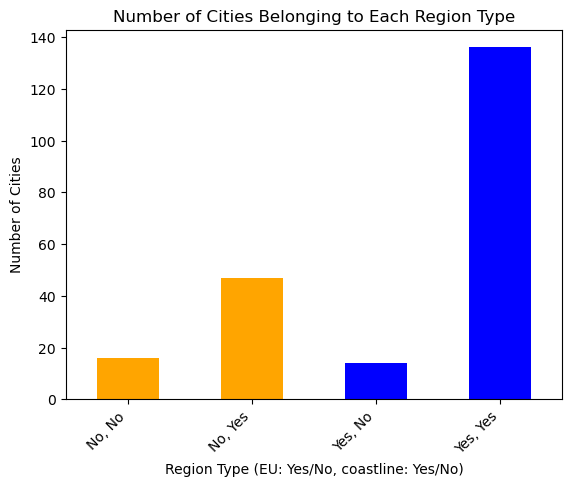

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a Pandas DataFrame
file_path = 'EuCitiesTemperatures.csv'
df = pd.read_csv(file_path)

# 3. Fill in the missing temperature values by the average temperature value of the similar region type.
#    A region type is a combination of whether it is in EU (yes/no) and whether it has a coastline (yes/no).
df['temperature'] = df.groupby(['EU', 'coastline'])['temperature'].transform(lambda x: x.fillna(round(x.mean(), 2)))

# Bar chart for the number of cities belonging to each region type
region_counts = df.groupby(['EU', 'coastline']).size().reset_index(name='city count')

# Plotting
plt.figure(figsize=(10, 6))
bar_colors = ['blue' if eu == 'yes' else 'orange' for eu in region_counts['EU']]
region_counts.plot(kind='bar', x='EU', y='city count', color=bar_colors, legend=False)
plt.title('Number of Cities Belonging to Each Region Type')
plt.xlabel('Region Type (EU: Yes/No, coastline: Yes/No)')
plt.ylabel('Number of Cities')
plt.xticks(range(len(region_counts)), [f'{eu.capitalize()}, {coast.capitalize()}' for eu, coast in zip(region_counts['EU'], region_counts['coastline'])], rotation=45, ha='right')
plt.show()


2.Plot a scatter plot of latitude (y-axis) v/s longitude (x-axis) values to get a map-like visual of the cities under consideration. All the cities in the same country should have the same color.

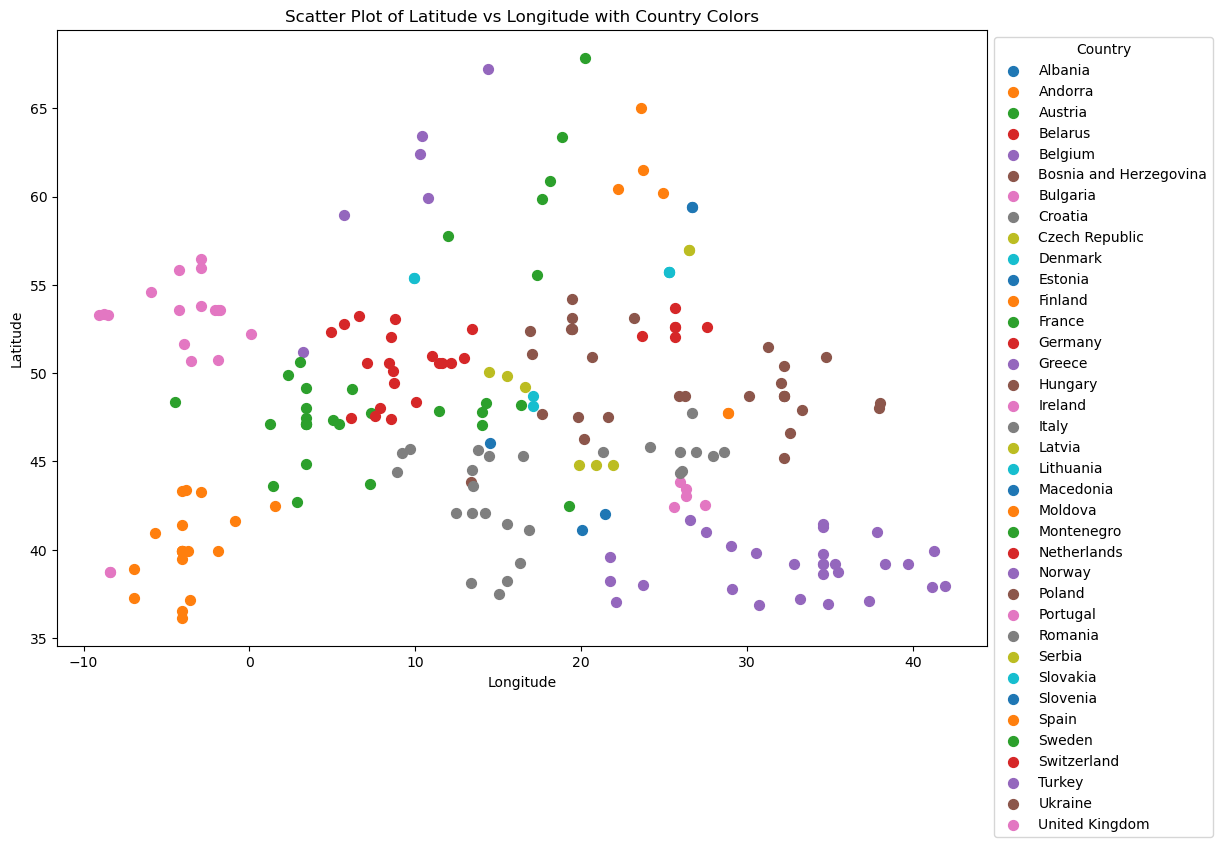

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a Pandas DataFrame
file_path = 'EuCitiesTemperatures.csv'
df = pd.read_csv(file_path)

# 1. Fill in the missing latitude and longitude values by calculating the average for that country.
#    Round the average to 2 decimal places.
df['latitude'] = df.groupby('country')['latitude'].transform(lambda x: x.fillna(round(x.mean(), 2)))
df['longitude'] = df.groupby('country')['longitude'].transform(lambda x: x.fillna(round(x.mean(), 2)))

# 3. Fill in the missing temperature values by the average temperature value of the similar region type.
#    A region type is a combination of whether it is in EU (yes/no) and whether it has a coastline (yes/no).
df['temperature'] = df.groupby(['EU', 'coastline'])['temperature'].transform(lambda x: x.fillna(round(x.mean(), 2)))

# Scatter plot of latitude vs longitude with cities in the same country having the same color
plt.figure(figsize=(12, 8))
for country, group in df.groupby('country'):
    plt.scatter(group['longitude'], group['latitude'], label=country, s=50)
plt.title('Scatter Plot of Latitude vs Longitude with Country Colors')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', title='Country')
plt.show()


3.The population column contains values unique to each country. So two cities of the same country will show the same population value. Plot a histogram of the number of countries belonging to each population group: split the population values into 5 bins (groups).

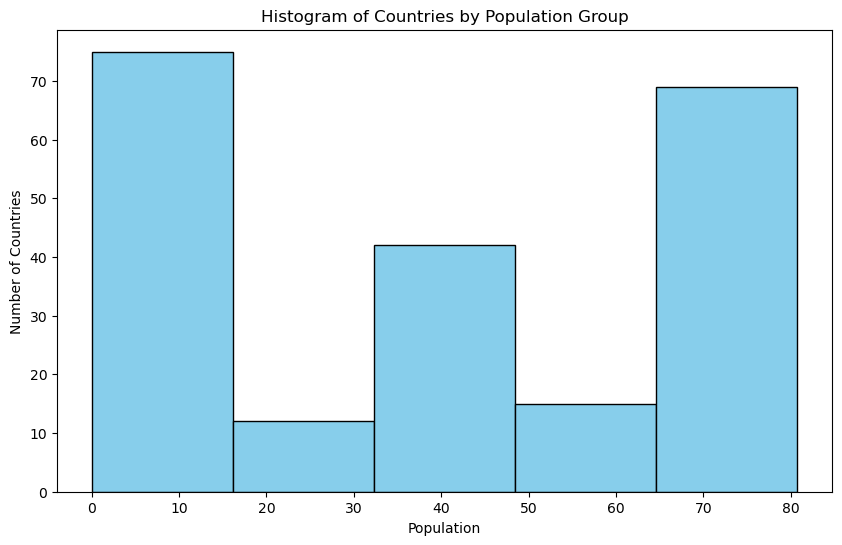

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a Pandas DataFrame
file_path = 'EuCitiesTemperatures.csv'
df = pd.read_csv(file_path)

# 1. Fill in the missing latitude and longitude values by calculating the average for that country.
#    Round the average to 2 decimal places.
df['latitude'] = df.groupby('country')['latitude'].transform(lambda x: x.fillna(round(x.mean(), 2)))
df['longitude'] = df.groupby('country')['longitude'].transform(lambda x: x.fillna(round(x.mean(), 2)))

# 3. Fill in the missing temperature values by the average temperature value of the similar region type.
#    A region type is a combination of whether it is in EU (yes/no) and whether it has a coastline (yes/no).
df['temperature'] = df.groupby(['EU', 'coastline'])['temperature'].transform(lambda x: x.fillna(round(x.mean(), 2)))

# Histogram of the number of countries belonging to each population group
plt.figure(figsize=(10, 6))
plt.hist(df['population'], bins=5, color='skyblue', edgecolor='black')
plt.title('Histogram of Countries by Population Group')
plt.xlabel('Population')
plt.ylabel('Number of Countries')
plt.show()


4.Plot subplots (2, 2), with proper titles, one each for the region types described in Preprocessing/Analysis #3 above.

Each subplot should be a scatter plot of Latitude (y-axis) vs. City (x-axis), where the color of the plot points should be based on the temperature values: ‘red’ for temperatures above 10, ‘blue’ for temperatures below 6 and ‘orange for temperatures between 6 and 10 (both inclusive). For each subplot, set xticks to an array of numbers from 0 to n-1 (both inclusive), where n is the total number of cities in each region type. This represents each city as a number between 0 and n-1.

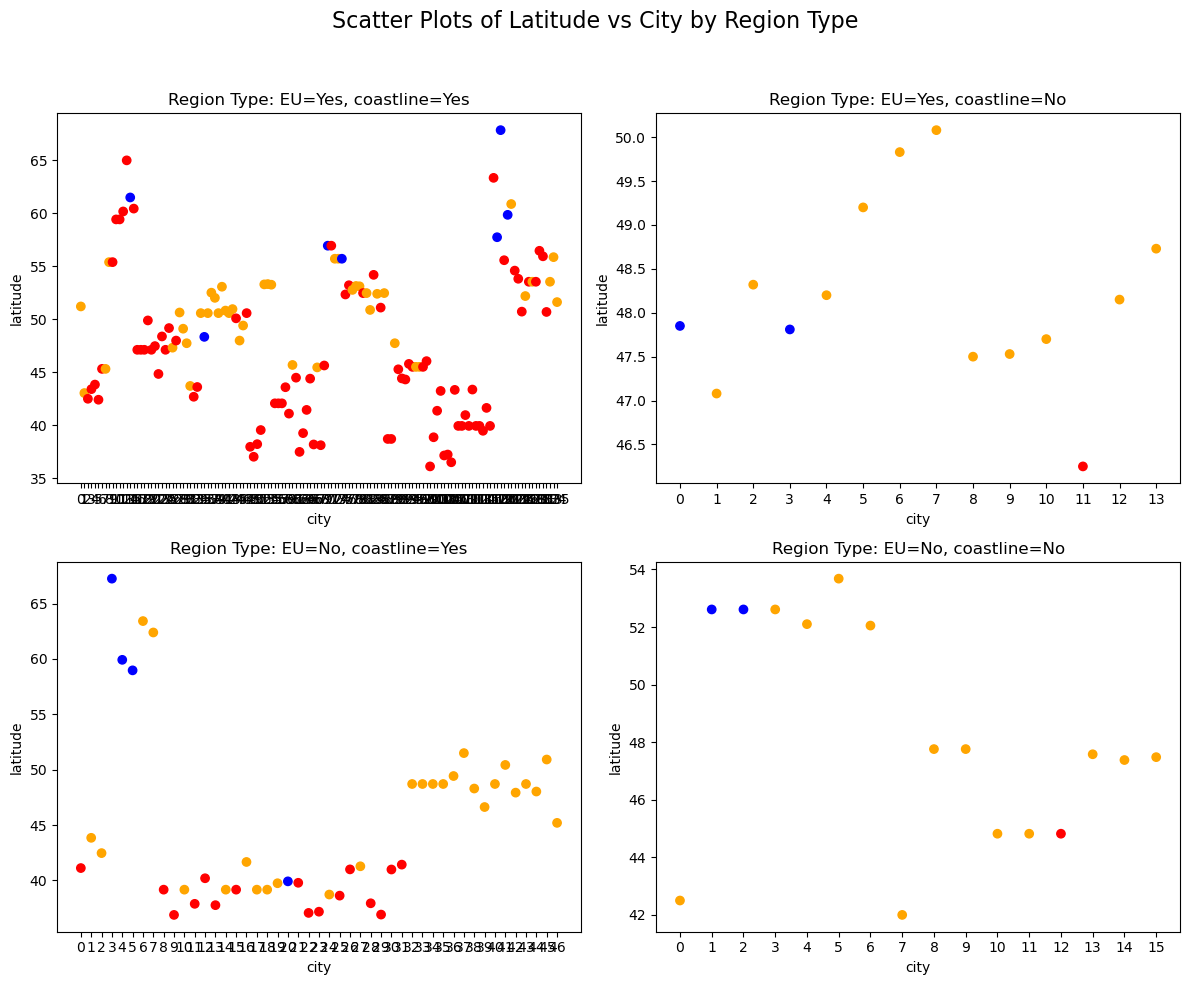

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a Pandas DataFrame
file_path = 'EuCitiesTemperatures.csv'
df = pd.read_csv(file_path)

# 1. Fill in the missing latitude and longitude values by calculating the average for that country.
#    Round the average to 2 decimal places.
df['latitude'] = df.groupby('country')['latitude'].transform(lambda x: x.fillna(round(x.mean(), 2)))
df['longitude'] = df.groupby('country')['longitude'].transform(lambda x: x.fillna(round(x.mean(), 2)))

# 3. Fill in the missing temperature values by the average temperature value of the similar region type.
#    A region type is a combination of whether it is in EU (yes/no) and whether it has a coastline (yes/no).
df['temperature'] = df.groupby(['EU', 'coastline'])['temperature'].transform(lambda x: x.fillna(round(x.mean(), 2)))
# Create subplots (2, 2)
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Scatter Plots of Latitude vs City by Region Type', fontsize=16)

# Define temperature color mapping
def get_color(temp):
    if temp > 10:
        return 'red'
    elif temp < 6:
        return 'blue'
    else:
        return 'orange'

# Iterate through region types and create scatter plots
for i, (eu, coast) in enumerate([('yes', 'yes'), ('yes', 'no'), ('no', 'yes'), ('no', 'no')]):
    subset_df = df[(df['EU'] == eu) & (df['coastline'] == coast)]
    
    # Assign colors based on temperature
    colors = subset_df['temperature'].apply(get_color)
    
    # Scatter plot
    axes[i // 2, i % 2].scatter(range(len(subset_df)), subset_df['latitude'], c=colors, label='cities')
    
    # Set xticks to represent each city as a number between 0 and n-1
    axes[i // 2, i % 2].set_xticks(range(len(subset_df)))
    
    # Set title and labels
    axes[i // 2, i % 2].set_title(f'Region Type: EU={eu.capitalize()}, coastline={coast.capitalize()}')
    axes[i // 2, i % 2].set_xlabel('city')
    axes[i // 2, i % 2].set_ylabel('latitude')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()